# Hospital Respiratory Forensics

A comprehensive analysis of hospital respiratory data, spanning from August 2020 through October 2024. This dataset, meticulously aggregated to national and state/territory levels, is reported to the Centers for Disease Control and Prevention’s (CDC) National Health Safety Network (NHSN). It offers a detailed view of metrics related to hospital capacity, occupancy, hospitalizations, and new admissions for COVID-19, Influenza, and Respiratory Syncytial Virus (RSV). The data reflects both mandated and voluntary reporting periods, capturing the dynamic changes in reporting requirements by the Centers for Medicare and Medicaid Services (CMS).

# Import Libraries, Preferences and Helper Functions

## Import Libraries

In [1]:
# Import necessary libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

## Preferences

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Set the default Seaborn style
sns.set_theme(style='whitegrid', font='serif')

## Helper Functions



### Custom Formatting Function

In [3]:
# Custom formatter function
def format_yaxis(ax):
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Load the Data

In [4]:
data = pd.read_csv("/kaggle/input/weekly-hospital-respiratory-data-and-metrics/raw_weekly_hospital_respiratory_data_2020_2024.csv")

# Display the first few rows of the data
data.head()

,Week Ending Date,Geographic aggregation,Number of Inpatient Beds,Number of Adult Inpatient Beds,Number of Pediatric Inpatient beds,Number of Inpatient Beds Occupied,Number of Adult Inpatient Beds Occupied,Number of Pediatric Inpatient Beds Occupied,Number of ICU Beds,Number of Adult ICU Beds,...,Absolute Change in the Percent Hospitals Reporting Adult RSV Admissions from Prior Week,Absolute Change in the Percent Hospitals Reporting RSV Admissions from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by COVID-19 Patients from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by Influenza Patients from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by RSV Patients from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied by COVID-19 Patients from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied by Influenza Patients from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied by RSV Patients from Prior Week
0,2023-08-12,WA,10650.0,9282.0,482.0,9040.0,8117.0,339.0,1623.0,1059.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
1,2023-08-12,WI,10752.0,9824.0,425.0,7574.0,7027.0,286.0,1566.0,1232.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
2,2023-08-12,WV,4813.0,4556.0,256.0,3701.0,3562.0,139.0,639.0,595.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
3,2023-08-12,WY,1318.0,1142.0,25.0,559.0,534.0,6.0,114.0,109.0,...,0.0,0.0,0.03,0.03,0.03,0.03,0.0,0.03,0.03,0.0
4,2023-08-19,AK,1354.0,1192.0,77.0,1054.0,939.0,43.0,184.0,126.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0


# Data Cleaning

## Remove White Spaces

In [5]:
# Remove leading and trailing whitespaces from column names
data.columns = data.columns.str.strip()

# EDA: General

In [6]:
# Display summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of Inpatient Beds,12521.0,23993.299018,90605.539900,7.0,2726.0,8017.0,16381.0,834208.0
Number of Adult Inpatient Beds,12506.0,21658.877899,81756.939919,3.0,2329.0,7253.5,15006.5,746110.0
Number of Pediatric Inpatient beds,12485.0,1440.099880,5514.682973,0.0,145.0,439.0,910.0,73572.0
Number of Inpatient Beds Occupied,12521.0,27972.333040,808421.106845,0.0,1988.0,5465.0,12047.0,64044023.0
Number of Adult Inpatient Beds Occupied,12510.0,26482.350200,808070.108376,0.0,1757.0,5053.5,10975.5,64002654.0
...,...,...,...,...,...,...,...,...
Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by Influenza Patients from Prior Week,12711.0,0.003557,0.077205,-1.0,0.0,0.0,0.0,1.0
Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by RSV Patients from Prior Week,12711.0,0.003616,0.039475,-1.0,0.0,0.0,0.0,1.0
Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied by COVID-19 Patients from Prior Week,12711.0,0.000105,0.054399,-1.0,0.0,0.0,0.0,1.0
Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied by Influenza Patients from Prior Week,12711.0,0.003313,0.076576,-1.0,0.0,0.0,0.0,1.0


## Data Types

In [7]:
# Display data types of each column
data.dtypes.T

Week Ending Date                                                                                                             object
Geographic aggregation                                                                                                       object
Number of Inpatient Beds                                                                                                    float64
Number of Adult Inpatient Beds                                                                                              float64
Number of Pediatric Inpatient beds                                                                                          float64
                                                                                                                             ...   
Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by Influenza Patients from Prior Week    float64
Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Oc

In [8]:
# Display the shape of the data
data.shape

(12768, 157)

# EDA: Visualization

## Percentage of Inpatient Beds Occupied by COVID-19 Patients

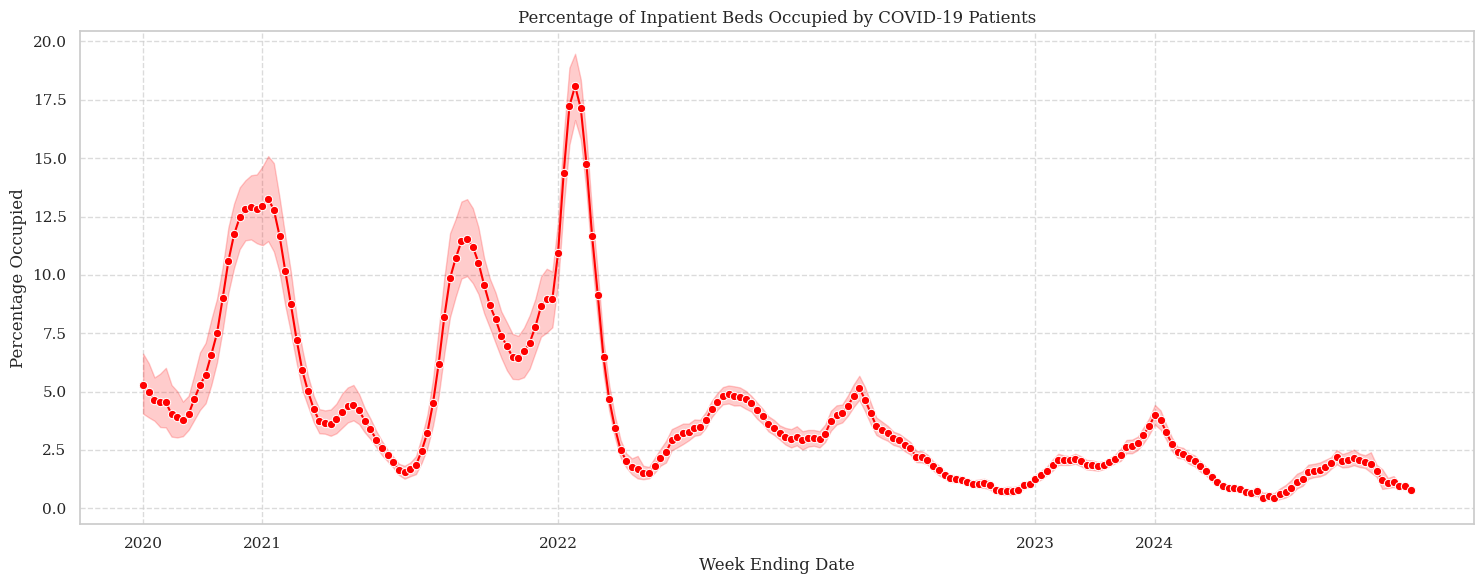

In [9]:
# Convert 'Week Ending Date' to datetime
data['Week Ending Date'] = pd.to_datetime(data['Week Ending Date'])

# Convert percentages from 0.25 to 25%
data['Percent Inpatient Beds Occupied by COVID-19 Patients'] *= 100

# Set the figure size
plt.figure(figsize=(15, 6))

# Use Seaborn to plot the data
sns.lineplot(x='Week Ending Date', y='Percent Inpatient Beds Occupied by COVID-19 Patients', data=data, marker='o', color='red')

# Set the title, x-axis label, and y-axis label
plt.title('Percentage of Inpatient Beds Occupied by COVID-19 Patients')
plt.xlabel('Week Ending Date')
plt.ylabel('Percentage Occupied')

# Customize x-axis ticks to show only the years
data['Week Ending Date'] = pd.to_datetime(data['Week Ending Date'])

# Get unique years and their first occurrences
unique_years = data['Week Ending Date'].dt.year.unique()
tick_positions = [data[data['Week Ending Date'].dt.year == year]['Week Ending Date'].iloc[0] for year in unique_years]
tick_labels = unique_years

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_positions, labels=tick_labels)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

**Key Observations**



1. **Initial Spike in 2020**: The graph shows a significant initial spike in the percentage of inpatient beds occupied by COVID-19 patients in 2020. This is consistent with the early stages of the COVID-19 pandemic when the virus first emerged and healthcare systems were overwhelmed.

2. **Fluctuations Over Time**: The percentage of inpatient beds occupied by COVID-19 patients fluctuates over the years, indicating varying levels of COVID-19 activity. There are periods of higher occupancy, followed by periods of lower occupancy, suggesting that the pandemic was not consistent in its impact on hospital resources.

3. **Peak in 2021**: There appears to be a peak in 2021, where the percentage of inpatient beds occupied by COVID-19 patients reaches its highest point. This could be attributed to various factors such as the spread of new variants, changes in public health measures, and the general progression of the pandemic.

4. **Decline in 2022 and 2023**: The percentage of inpatient beds occupied by COVID-19 patients shows a decline in 2022 and 2023. This could be due to increased vaccination rates, better treatment options, and more effective public health strategies.

5. **Moderate Levels in 2024**: By 2024, the percentage of inpatient beds occupied by COVID-19 patients remains relatively moderate, suggesting that the pandemic has become more manageable, although not completely eradicated.



**Conclusion**

The graph illustrates the dynamic nature of the COVID-19 pandemic's impact on hospital inpatient bed occupancy. It highlights the initial surge in 2020, the peak in 2021, and the subsequent decline and stabilization in the following years. This visualization is crucial for understanding the burden of COVID-19 on healthcare systems and the effectiveness of public health interventions over time.

## Comparison of ICU Bed Occupancy by Disease (COVID-19, Influenza, RSV)

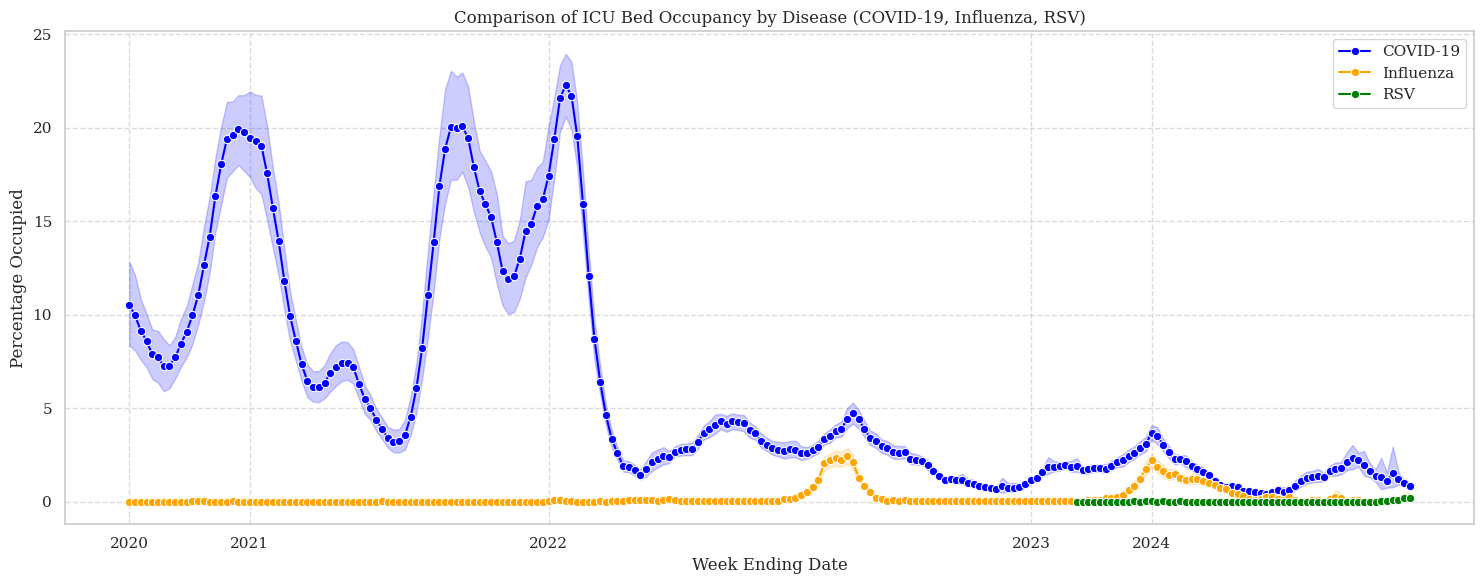

In [10]:
# Convert 'Week Ending Date' to datetime
data['Week Ending Date'] = pd.to_datetime(data['Week Ending Date'])

# Convert percentages from 0.25 to 25%
data['Percent ICU Beds Occupied by COVID-19 Patients'] *= 100
data['Percent ICU Beds Occupied by Influenza Patients'] *= 100
data['Percent ICU Beds Occupied by RSV Patients'] *= 100

# Set the figure size
plt.figure(figsize=(15, 6))

# Use Seaborn to plot the data
sns.lineplot(x='Week Ending Date', y='Percent ICU Beds Occupied by COVID-19 Patients', data=data, marker='o', label='COVID-19', color='blue')
sns.lineplot(x='Week Ending Date', y='Percent ICU Beds Occupied by Influenza Patients', data=data, marker='o', label='Influenza', color='orange')
sns.lineplot(x='Week Ending Date', y='Percent ICU Beds Occupied by RSV Patients', data=data, marker='o', label='RSV', color='green')

# Set the title, x-axis label, and y-axis label
plt.title('Comparison of ICU Bed Occupancy by Disease (COVID-19, Influenza, RSV)')
plt.xlabel('Week Ending Date')
plt.ylabel('Percentage Occupied')

# Customize x-axis ticks to show only the years
unique_years = data['Week Ending Date'].dt.year.unique()
tick_positions = [data[data['Week Ending Date'].dt.year == year]['Week Ending Date'].iloc[0] for year in unique_years]
tick_labels = unique_years
plt.xticks(ticks=tick_positions, labels=tick_labels)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

**Key Observations**



1. **COVID-19 Dominance in 2020 and 2021**: The graph shows that COVID-19 occupied a significant percentage of ICU beds in 2020 and 2021, reaching its peak during these years. This is consistent with the global impact of the COVID-19 pandemic during its initial and peak phases.

2. **Influenza and RSV Occupancy**: Influenza and RSV show lower occupancy rates compared to COVID-19 throughout the observed period. However, there are noticeable spikes in ICU bed occupancy for both Influenza and RSV, particularly in 2021 and 2022. These spikes could be attributed to seasonal outbreaks of these respiratory diseases.

3. **Decline in COVID-19 Occupancy in 2022 and 2023**: The percentage of ICU beds occupied by COVID-19 patients shows a decline in 2022 and 2023. This could be due to increased vaccination rates, better treatment options, and more effective public health strategies.

4. **Fluctuations in Influenza and RSV**: The occupancy rates for Influenza and RSV fluctuate over the years, indicating seasonal variations and periodic outbreaks. The peaks in these diseases' occupancy rates suggest that they continue to pose a significant burden on ICU resources, especially during their respective seasons.

5. **Moderate Levels in 2024**: By 2024, the percentage of ICU beds occupied by COVID-19, Influenza, and RSV remains relatively moderate, suggesting that the healthcare system has adapted to managing these diseases more effectively.



**Conclusion**



The graph illustrates the dynamic nature of ICU bed occupancy by COVID-19, Influenza, and RSV over the years. It highlights the dominance of COVID-19 in 2020 and 2021, the subsequent decline in its occupancy rates, and the fluctuating but significant impact of Influenza and RSV. This visualization is crucial for understanding the burden of these diseases on ICU resources and the effectiveness of public health interventions over time. The data suggests that while COVID-19 initially overwhelmed ICU capacities, the healthcare system has adapted to manage all three diseases more effectively by 2024.

## Total Patients Hospitalized with COVID-19 Over Time

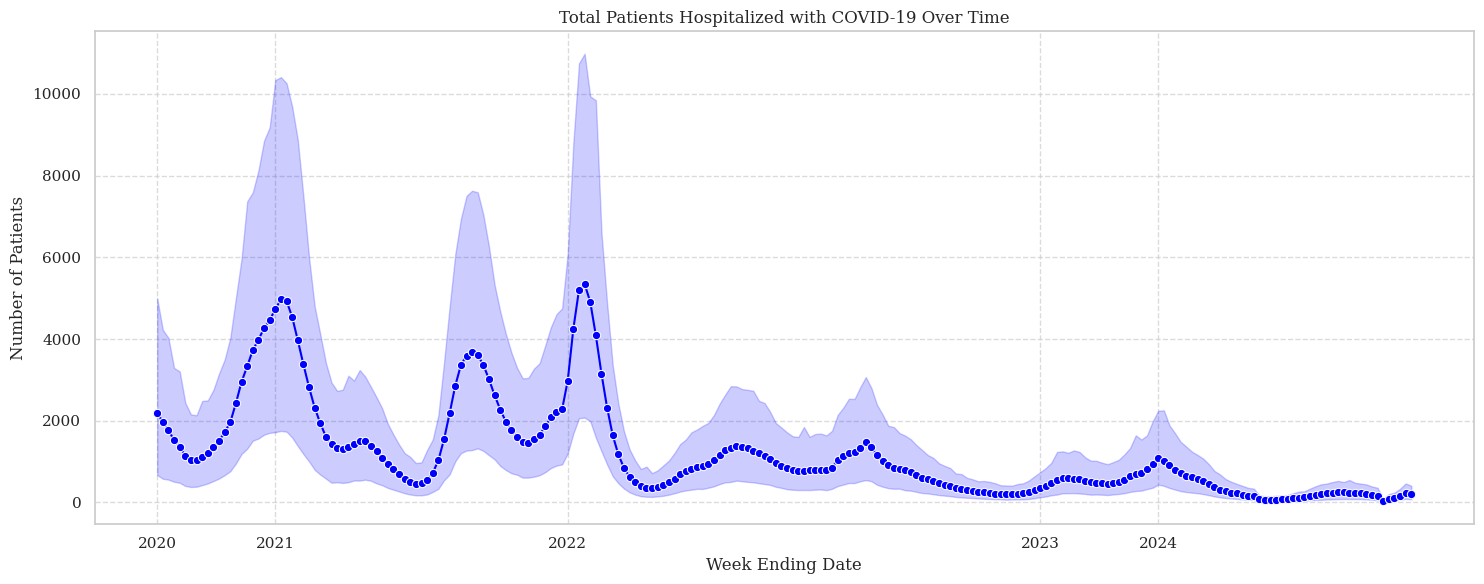

In [11]:
# Convert 'Week Ending Date' to datetime
data['Week Ending Date'] = pd.to_datetime(data['Week Ending Date'])

# Set the figure size
plt.figure(figsize=(15, 6))

# Use Seaborn to plot the data
sns.lineplot(x='Week Ending Date', y='Total Patients Hospitalized with COVID-19', data=data, marker='o', color='blue')

# Set the title, x-axis label, and y-axis label
plt.title('Total Patients Hospitalized with COVID-19 Over Time')
plt.xlabel('Week Ending Date')
plt.ylabel('Number of Patients')

# Customize x-axis ticks to show only the years
unique_years = data['Week Ending Date'].dt.year.unique()
tick_positions = [data[data['Week Ending Date'].dt.year == year]['Week Ending Date'].iloc[0] for year in unique_years]
tick_labels = unique_years
plt.xticks(ticks=tick_positions, labels=tick_labels)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

**Key Observations**



1. **Initial Surge in 2020**: The graph shows a significant initial surge in the number of patients hospitalized with COVID-19 in 2020. This is consistent with the early stages of the COVID-19 pandemic when the virus first emerged and healthcare systems were overwhelmed.

2. **Peak in 2021**: There appears to be a peak in 2021, where the number of patients hospitalized with COVID-19 reaches its highest point. This could be attributed to various factors such as the spread of new variants, changes in public health measures, and the general progression of the pandemic.

3. **Decline in 2022 and 2023**: The number of patients hospitalized with COVID-19 shows a decline in 2022 and 2023. This could be due to increased vaccination rates, better treatment options, and more effective public health strategies.

4. **Moderate Levels in 2024**: By 2024, the number of patients hospitalized with COVID-19 remains relatively moderate, suggesting that the pandemic has become more manageable, although not completely eradicated.

5. **Fluctuations Over Time**: The number of patients hospitalized with COVID-19 fluctuates over the years, indicating varying levels of COVID-19 activity. There are periods of higher hospitalization, followed by periods of lower hospitalization, suggesting that the pandemic was not consistent in its impact on hospital resources.



**Conclusion**



The graph illustrates the dynamic nature of the COVID-19 pandemic's impact on hospitalization rates. It highlights the initial surge in 2020, the peak in 2021, and the subsequent decline and stabilization in the following years. This visualization is crucial for understanding the burden of COVID-19 on healthcare systems and the effectiveness of public health interventions over time. The data suggests that while COVID-19 initially overwhelmed hospital capacities, the healthcare system has adapted to manage the disease more effectively by 2024.

## Distribution of Pediatric COVID-19 Admissions by Age Group

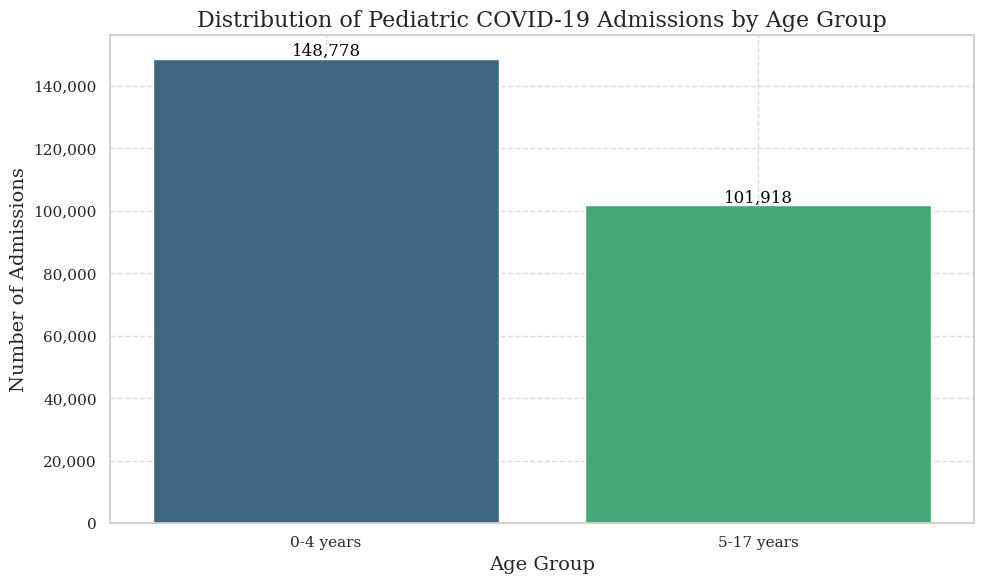

In [12]:
# Create a DataFrame for the distribution
ped_covid_admissions = pd.DataFrame({
    'Age Group': ['0-4 years', '5-17 years'],
    'Admissions': [data['Number of Pediatric COVID-19 Admissions, 0-4 years'].sum(), data['Number of Pediatric COVID-19 Admissions, 5-17 years'].sum()]

})

# Set the figure size
plt.figure(figsize=(10, 6))

# Use Seaborn to plot the data
ax = sns.barplot(x='Age Group', y='Admissions', data=ped_covid_admissions, palette='viridis')

# Set the title, x-axis label, and y-axis label
plt.title('Distribution of Pediatric COVID-19 Admissions by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Admissions', fontsize=14)

# Add data labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)


# Apply the custom y-axis formatter
format_yaxis(ax)

# Display the plot
plt.tight_layout()
plt.show()

## Comparison of Total ICU Patients Hospitalized with COVID-19, Influenza, and RSV

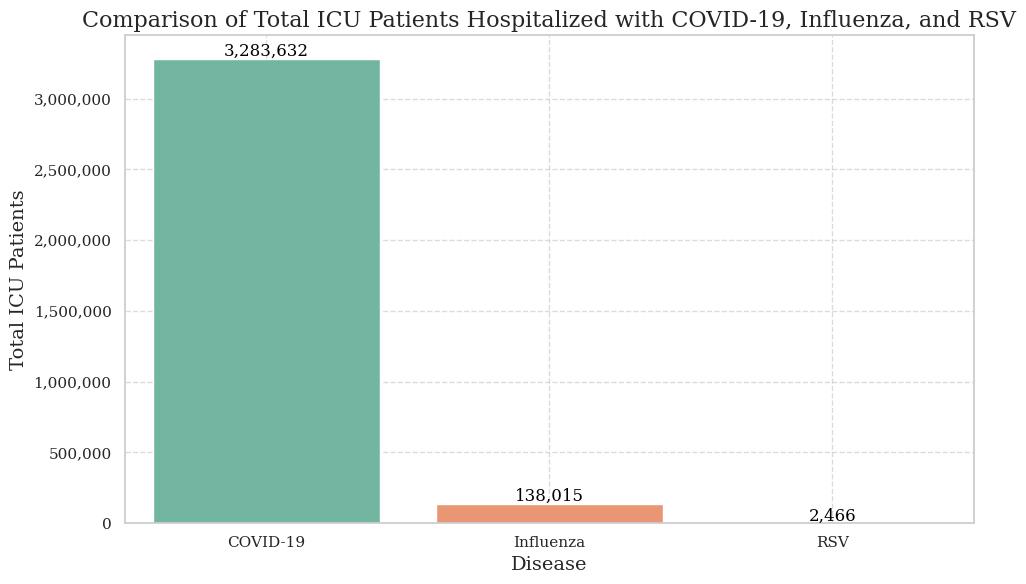

In [13]:
# Create a DataFrame for the comparison
icu_patients = pd.DataFrame({
    'Disease': ['COVID-19', 'Influenza', 'RSV'],
    'Total ICU Patients': [data['Total ICU Patients Hospitalized with COVID-19'].sum(), data['Total ICU Patients Hospitalized with Influenza'].sum(), data['Total ICU Patients Hospitalized with RSV'].sum()]
})

# Set the figure size
plt.figure(figsize=(10, 6))

# Use Seaborn to plot the data
ax = sns.barplot(x='Disease', y='Total ICU Patients', data=icu_patients, palette='Set2')

# Set the title, x-axis label, and y-axis label
plt.title('Comparison of Total ICU Patients Hospitalized with COVID-19, Influenza, and RSV', fontsize=16)
plt.xlabel('Disease', fontsize=14)
plt.ylabel('Total ICU Patients', fontsize=14)

# Add data labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points') 

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Apply the custom y-axis formatter
format_yaxis(ax)

# Display the plot
plt.tight_layout()
plt.show()

## Percentage of Adult and Pediatric COVID-19 Admissions

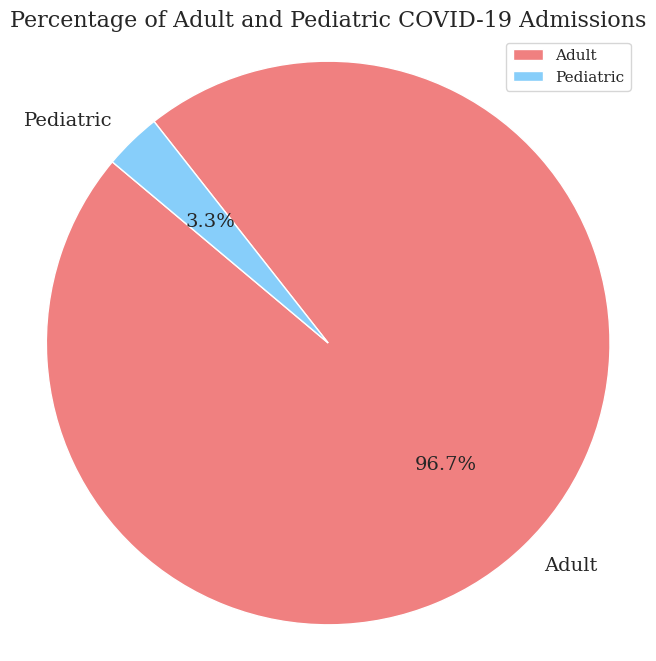

In [14]:
# Calculate percentages
total_adult_covid_admissions = data['Total Adult COVID-19 Admissions'].sum()
total_ped_covid_admissions = data['Total Pediatric COVID-19 Admissions'].sum()
total_covid_admissions = total_adult_covid_admissions + total_ped_covid_admissions

percent_adult = (total_adult_covid_admissions / total_covid_admissions) * 100
percent_ped = (total_ped_covid_admissions / total_covid_admissions) * 100

# Plotting
labels = ['Adult', 'Pediatric']
sizes = [percent_adult, percent_ped]
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title('Percentage of Adult and Pediatric COVID-19 Admissions', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(labels, loc="best")

# Display the plot
plt.show()

**Key Observations**



1. **Dominance of Adult Admissions**: The graph shows that a significant majority of COVID-19 admissions are for adults, with approximately 96.7% of the total admissions. This indicates that adults are much more likely to be hospitalized with COVID-19 compared to pediatric patients.

2. **Minority of Pediatric Admissions**: The pediatric segment of the pie chart represents only about 3.3% of the total COVID-19 admissions. This suggests that pediatric patients are much less affected by COVID-19 in terms of hospitalizations.

3. **Clear Visual Separation**: The pie chart clearly separates the two segments, making it easy to visually compare the proportions of adult and pediatric admissions. The use of different colors for each segment further enhances this clarity.

4. **Percentage Labels**: The percentages within the pie chart provide precise information about the distribution, making it easy to understand the relative proportions without needing to refer to external data.



**Conclusion**



The graph illustrates a significant disparity in the distribution of COVID-19 admissions between adults and pediatric patients. The overwhelming majority of admissions are for adults, while pediatric admissions are a small fraction of the total. This visualization is crucial for understanding the demographic impact of COVID-19 and for planning healthcare resources and interventions. The data suggests that while adults are the primary focus of COVID-19 hospitalizations, pediatric patients also require attention, albeit to a lesser extent.

## Geographic Distribution of Total Patients Hospitalized with COVID-19

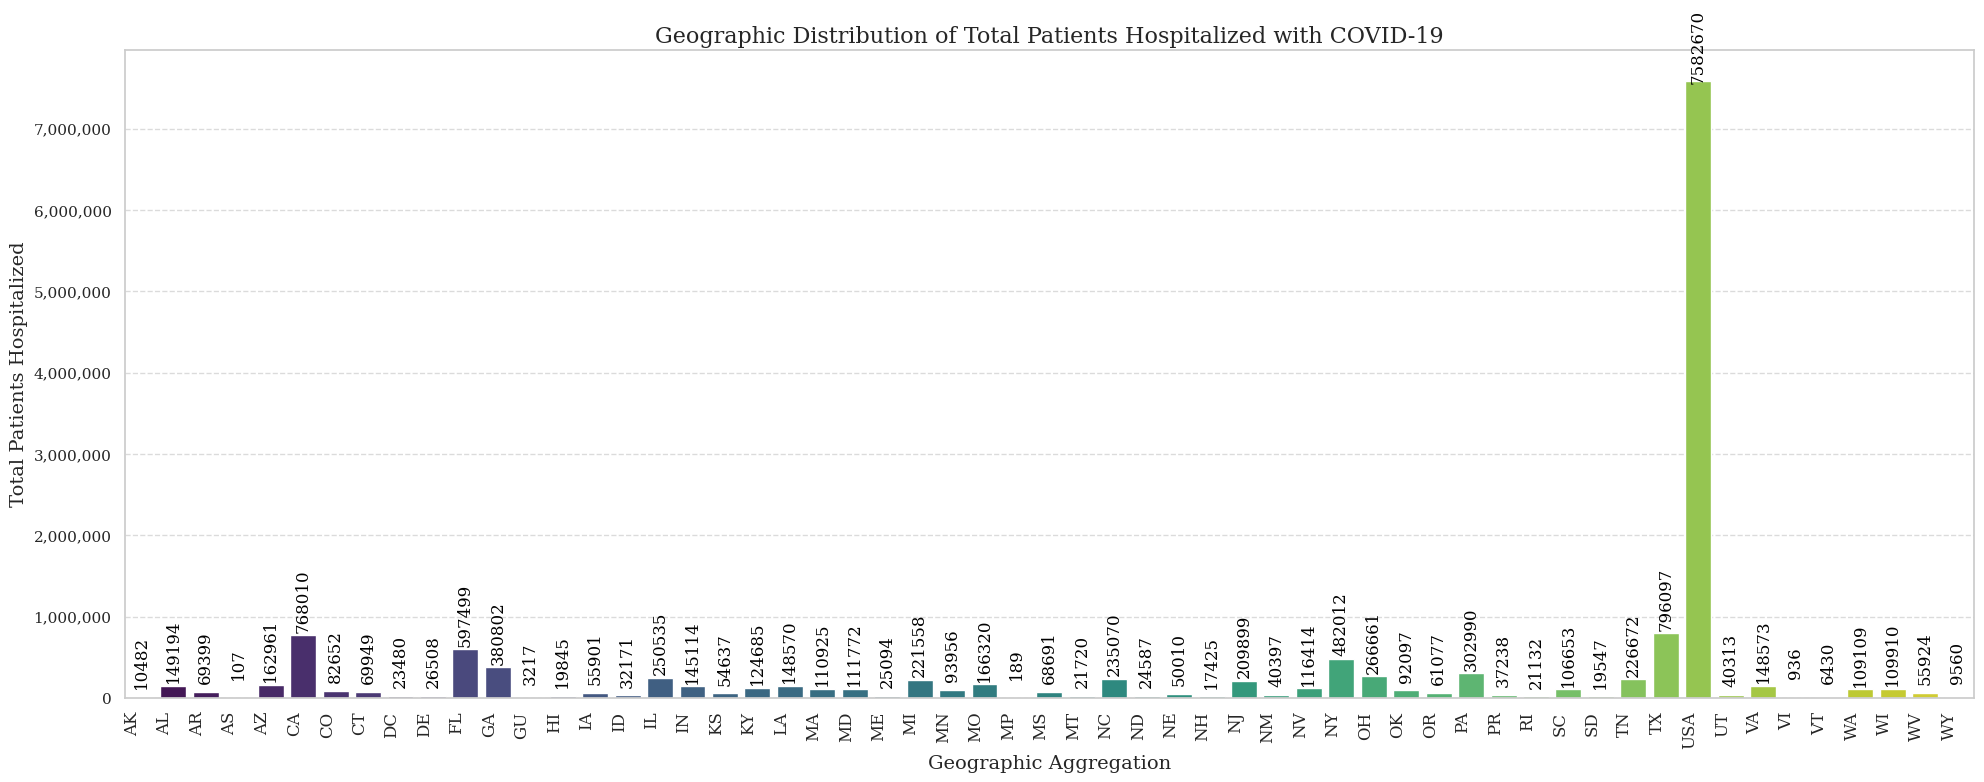

In [15]:
# Group by geographic aggregation
geo_distribution = data.groupby('Geographic aggregation')['Total Patients Hospitalized with COVID-19'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(20, 8))

# Use Seaborn to plot the data
ax = sns.barplot(x='Geographic aggregation', y='Total Patients Hospitalized with COVID-19', data=geo_distribution, palette='viridis')

# Set the title, x-axis label, and y-axis label
plt.title('Geographic Distribution of Total Patients Hospitalized with COVID-19', fontsize=16)
plt.xlabel('Geographic Aggregation', fontsize=14)
plt.ylabel('Total Patients Hospitalized', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 25),
                       textcoords='offset points', rotation=90)

# Apply the custom y-axis formatter
format_yaxis(ax)

# Display the plot
plt.tight_layout()
plt.show()

**Key Observations**



1. **Variation Across Geographic Aggregations**: The graph shows significant variation in the total number of patients hospitalized with COVID-19 across different geographic aggregations. Some regions have a much higher number of hospitalizations compared to others.

2. **Regional Hotspots**: There are clear regional hotspots where the number of patients hospitalized with COVID-19 is notably higher. These regions likely experienced more severe outbreaks or had higher population densities, contributing to a higher burden on healthcare systems.

3. **Comparative Analysis**: By comparing the heights of the bars, one can identify which geographic aggregations had the highest and lowest hospitalization rates. This information is crucial for understanding the geographic distribution of the COVID-19 burden and for planning resource allocation and public health interventions.

4. **Data Labels**: The data labels on top of each bar provide the exact number of patients hospitalized, making it easier to interpret the data without having to refer to the y-axis scale.



**Conclusion**



The graph illustrates the geographic distribution of total patients hospitalized with COVID-19, highlighting significant variations across different regions. It provides valuable insights into regional hotspots and the overall burden of COVID-19 on healthcare systems. This visualization is crucial for policymakers and healthcare planners to understand the geographic disparities in COVID-19 hospitalizations and to allocate resources effectively. The data suggests that while some regions were more severely impacted, others managed to keep hospitalization rates relatively low, likely due to varying public health measures and population characteristics.

## Trends in ICU Bed Occupancy Over Time

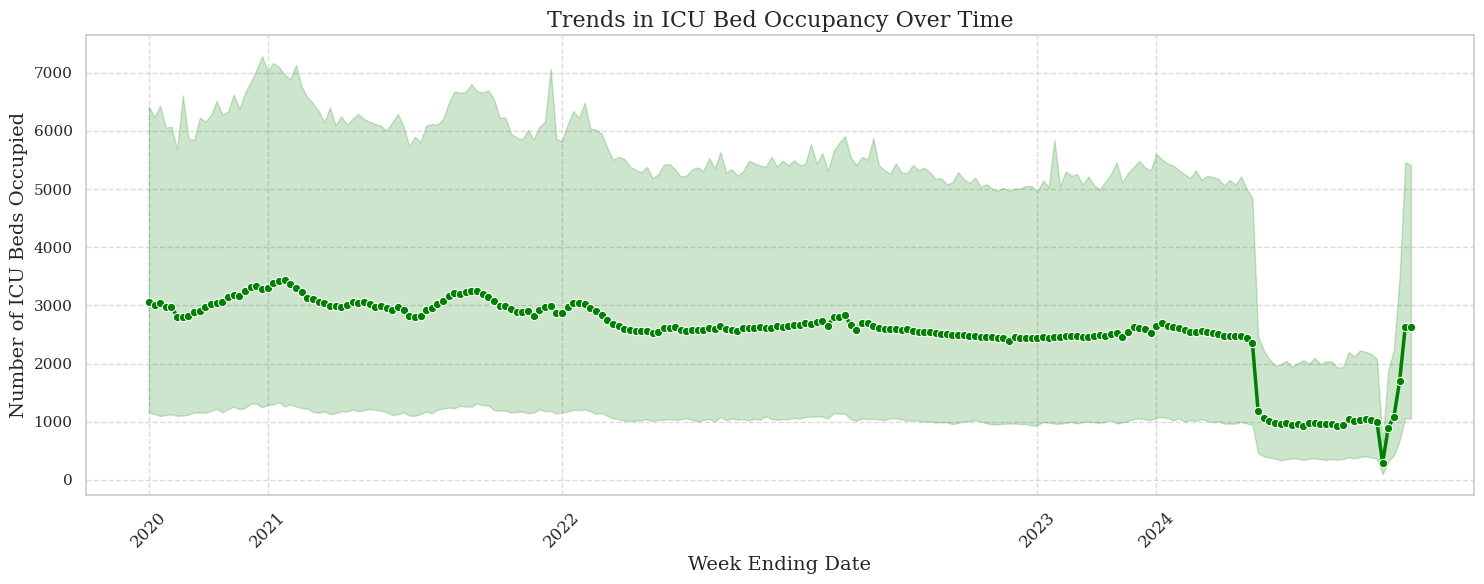

In [16]:
# Convert 'Week Ending Date' to datetime
data['Week Ending Date'] = pd.to_datetime(data['Week Ending Date'])

# Set the figure size
plt.figure(figsize=(15, 6))

# Use Seaborn to plot the data
sns.lineplot(x='Week Ending Date', y='Number of ICU Beds Occupied', data=data, marker='o', color='green', linewidth=2.5)

# Set the title, x-axis label, and y-axis label
plt.title('Trends in ICU Bed Occupancy Over Time', fontsize=16)
plt.xlabel('Week Ending Date', fontsize=14)
plt.ylabel('Number of ICU Beds Occupied', fontsize=14)

# Customize x-axis ticks to show only the years
unique_years = data['Week Ending Date'].dt.year.unique()
tick_positions = [data[data['Week Ending Date'].dt.year == year]['Week Ending Date'].iloc[0] for year in unique_years]
tick_labels = unique_years
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45, fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

**Key Observations**



1. **Initial Surge in ICU Bed Occupancy**: The graph shows a significant initial surge in the number of ICU beds occupied, particularly in the early stages of the observed period. This could be attributed to the onset of a major health crisis, such as a pandemic or a severe outbreak of a disease.

2. **Peak in ICU Bed Occupancy**: There appears to be a peak in ICU bed occupancy, where the number of beds occupied reaches its highest point. This peak could correspond to the most severe phase of the health crisis, when the demand for ICU beds was at its highest.

3. **Decline in ICU Bed Occupancy**: Following the peak, there is a noticeable decline in the number of ICU beds occupied. This could indicate that the health crisis is subsiding, or that healthcare systems have adapted and improved their capacity to manage the influx of patients.

4. **Fluctuations Over Time**: The number of ICU beds occupied fluctuates over time, indicating periods of higher and lower demand. These fluctuations could be due to various factors, such as the spread of new variants, changes in public health measures, and the general progression of the health crisis.

5. **Moderate Levels in Recent Periods**: In the most recent periods, the number of ICU beds occupied remains relatively moderate, suggesting that the health crisis has become more manageable, although not completely eradicated.



**Conclusion**



The graph illustrates the dynamic nature of ICU bed occupancy over time, highlighting the initial surge, the peak, and the subsequent decline in occupancy. It provides valuable insights into the impact of a health crisis on ICU resources and the effectiveness of public health interventions over time. The data suggests that while the health crisis initially overwhelmed ICU capacities, the healthcare system has adapted to manage the demand more effectively in recent periods. This visualization is crucial for policymakers and healthcare planners to understand the trends in ICU bed occupancy and to allocate resources accordingly.

## Comparison of Total Admissions for COVID-19, Influenza, and RSV

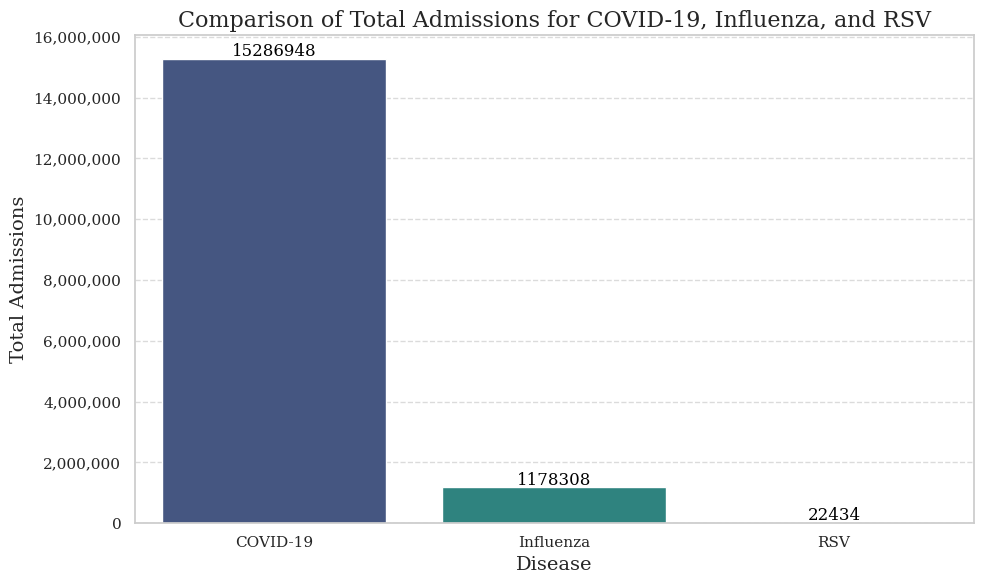

In [17]:
# Create a DataFrame for the comparison
total_admissions = pd.DataFrame({
    'Disease': ['COVID-19', 'Influenza', 'RSV'],
    'Total Admissions': [data['Total COVID-19 Admissions'].sum(), data['Total Influenza Admissions'].sum(), data['Total RSV Admissions'].sum()]
})

# Set the figure size
plt.figure(figsize=(10, 6))

# Use Seaborn to plot the data
ax = sns.barplot(x='Disease', y='Total Admissions', data=total_admissions, palette='viridis')

# Set the title, x-axis label, and y-axis label
plt.title('Comparison of Total Admissions for COVID-19, Influenza, and RSV', fontsize=16)
plt.xlabel('Disease', fontsize=14)
plt.ylabel('Total Admissions', fontsize=14)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Apply the custom y-axis formatter
format_yaxis(ax)

# Display the plot
plt.tight_layout()
plt.show()